https://towardsdatascience.com/why-you-should-forget-for-loop-for-data-science-code-and-embrace-vectorization-696632622d5f

https://github.com/tirthajyoti/PythonMachineLearning/blob/master/How%20fast%20are%20NumPy%20ops.ipynb

In [3]:
import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
N = 1000000 # Number of records to process
speed = [] # Empty list to store operation speeds (time taken)

Create a list of 1 million numbers

In [13]:
l1 = list(100*(np.random.random(N))+1)
print("Length of l1:",len(l1))

Length of l1: 1000000


In [8]:
print("First few elements of the array:", l1[:4])

First few elements of the array: [87.978248938263235, 69.731985772630921, 100.55070899676568, 35.851805927548931]


### Create a NumPy ndarray object from that list i.e. vectorize it

In [16]:
a1 = np.array(l1)

In [17]:
print("Shape of a1 object:",a1.shape)
print("Type of a1 object:",type(a1))

Shape of a1 object: (1000000,)
Type of a1 object: <class 'numpy.ndarray'>


Create a blank list for appending elements

In [18]:
l2=[] # Just a blank list to append to

### How fast is - For loop and appending¶


In [24]:
%%timeit
for item in l1:
    l2.append(lg10(item))

218 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### How fast it - List comprehension

In [25]:
%%timeit
l2 = [lg10(i) for i in range(1,1000001)]

145 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### How fast is - Map function method

In [26]:
def op1(x):
    return (lg10(x))

In [29]:
%%timeit
l2=list(map(op1,l1))

207 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### How fast is - NumPy operation (vectorized array)

In [30]:
%%timeit
a2=np.log10(a1)


7.61 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Plot the time taken by each operation

ValueError: incompatible sizes: argument 'height' must be length 4 or scalar

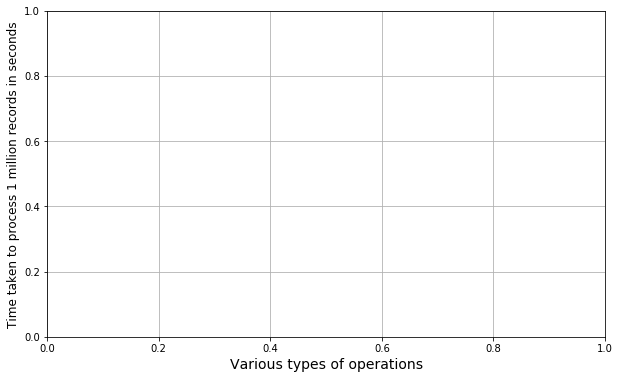

In [31]:
plt.figure(figsize=(10,6))
plt.ylabel("Time taken to process 1 million records in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(left=[1,2,3,4],height=speed, align='center',tick_label=['For-loop','List comprehension','Map function','NumPy'])